# PART I:  (30%) Practice using Pandas for data extraction. 



**&#167; Task:**  **Retrieve data from a repository using Pandas.**

In class lecture, we talked about using URLs to 
call the Dataframe function [`pandas.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

You will use that function and place data into a DataFrame for each day in your station
for you last name group listed above.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(
    "https://cfl-code.cis240485.projects.jetstream-cloud.org:3000/kmaull/spring25_data/raw/branch/main/data/cfl001/20250415_cfl001.csv",
    header=None,
    names=['idx', 'device', 'sensor','m','t']
)

**&#167; Task:**  **Combine multiple files into one large Dataframe.**

From the first task, use the Pandas [`pandas.concat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)
to combine all files **in your group** into a single Dataframe.  

There will be three files, and you should use a loop.

Make sure they are in the order of their date retrieval.

### EXAMPLE

In [3]:
## THIS CODE TAKES THE FIRST 5 ROWS OF DF AND CONCATENATES ONTO ITSELF
pd.concat([df.iloc[:5], df.iloc[:5]])

,idx,device,sensor,m,t
0,158812,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm10standard,2.0,1744649659
1,158813,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm10standard,2.0,1744649659
2,158814,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm25standard,2.0,1744649660
3,158815,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm25standard,2.0,1744649660
4,158870,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm10standard,2.0,1744649742
0,158812,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm10standard,2.0,1744649659
1,158813,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm10standard,2.0,1744649659
2,158814,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm25standard,2.0,1744649660
3,158815,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm25standard,2.0,1744649660
4,158870,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm10standard,2.0,1744649742


Just remember, `concat()` takes a list od Dataframes!

In [4]:
## YOUR SOLUTION CODE GOES HERE

**&#167; Task:**  **Store the combined data in a single CSV file.**

With a single Dataframe in hand, store
that into a a file named `"cflXXX_combined_data.csv"`.

Use the [`pandas.DataFrame.to_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) function.

In [5]:
## YOUR SOLUTION CODE GOES HERE

# PART II: (40%) Practice using Pandas for data engineering. 


**&#167; Task:**  **Convert UNIX time to a time-date string.**

Study:

* [`pandas.to_datetime()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html), don't over think it!

### Example

In [6]:
pd.to_datetime( df.iloc[:5]['t'], unit='s' ) # notice we are only selecting the first 5 rows

0   2025-04-14 16:54:19
1   2025-04-14 16:54:19
2   2025-04-14 16:54:20
3   2025-04-14 16:54:20
4   2025-04-14 16:55:42
Name: t, dtype: datetime64[ns]

In [7]:
### YOUR SOLUTION CODE GOES HERE

**&#167; Task:**  **Eliminate unneeded columns.**

Study:

* [`pandas.DataFrame.drop()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) &#8594; use the `axis=1` parameter
* the unneeded columns are the first and second 

### Example

Let's eliminate the `idx` column from `df`.  In the example, we will just use the first 5 rows to keep it simple.

In [8]:
df.iloc[:5] # display the first 5 rows

,idx,device,sensor,m,t
0,158812,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm10standard,2.0,1744649659
1,158813,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm10standard,2.0,1744649659
2,158814,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm25standard,2.0,1744649660
3,158815,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm25standard,2.0,1744649660
4,158870,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm10standard,2.0,1744649742


In [9]:
df.iloc[:5].drop('idx', axis=1)

,device,sensor,m,t
0,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm10standard,2.0,1744649659
1,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm10standard,2.0,1744649659
2,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm25standard,2.0,1744649660
3,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm25standard,2.0,1744649660
4,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm10standard,2.0,1744649742


**REMEMBER:** To store the new dataframe, we will need to do something like this:

```python

df_reduced = df.iloc[:5].drop('idx', axis=1)

**&#167; Task:**  **Filter the remaining data to only include PM25 ENV data points.**

* Study [`pandas.Dataframe.query()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) and see the examples in the notebook
* store the filtered Dataframe into a new one called `df_filtered`

In [10]:
df.iloc[:].query("sensor.str.contains('pm25env')") 

,idx,device,sensor,m,t
18,159242,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm25env,3.0,1744650076
19,159243,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm25env,3.0,1744650076
44,159334,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm25env,2.0,1744650159
45,159335,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm25env,2.0,1744650159
68,159472,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm25env,4.0,1744650242
...,...,...,...,...,...
5383,198284,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm25env,6.0,1744681681
5408,198383,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm25env,5.0,1744681762
5409,198384,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm25env,5.0,1744681762
5436,198455,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm25env,6.0,1744681844


### Set the index to the date/time

In [11]:
df['date'] = pd.to_datetime(df['t'], unit='s')

Notice the new column `date` is how we want!

In [12]:
df.head()

,idx,device,sensor,m,t,date
0,158812,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm10standard,2.0,1744649659,2025-04-14 16:54:19
1,158813,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm10standard,2.0,1744649659,2025-04-14 16:54:19
2,158814,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm25standard,2.0,1744649660,2025-04-14 16:54:20
3,158815,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm25standard,2.0,1744649660,2025-04-14 16:54:20
4,158870,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm10standard,2.0,1744649742,2025-04-14 16:55:42


We can set the index to the `date` column.

In [13]:
df.index = df.date

In [14]:
df.head()

,idx,device,sensor,m,t,date
date,,,,,,
2025-04-14 16:54:19,158812,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm10standard,2.0,1744649659,2025-04-14 16:54:19
2025-04-14 16:54:19,158813,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm10standard,2.0,1744649659,2025-04-14 16:54:19
2025-04-14 16:54:20,158814,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm25standard,2.0,1744649660,2025-04-14 16:54:20
2025-04-14 16:54:20,158815,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm25standard,2.0,1744649660,2025-04-14 16:54:20
2025-04-14 16:55:42,158870,m5atom/esp32/cfl001,grove/i2c/pmsa003i/pm10standard,2.0,1744649742,2025-04-14 16:55:42


Now we can clean everything up by removing columns, filtering and sorting.

In [15]:
df.drop(['idx', 'device', 't', 'date'], axis=1).query("sensor.str.contains('pm25env').values").sort_index()

,sensor,m
date,,
2025-04-14 17:01:16,grove/i2c/pmsa003i/pm25env,3.0
2025-04-14 17:01:16,grove/i2c/pmsa003i/pm25env,3.0
2025-04-14 17:02:39,grove/i2c/pmsa003i/pm25env,2.0
2025-04-14 17:02:39,grove/i2c/pmsa003i/pm25env,2.0
2025-04-14 17:04:02,grove/i2c/pmsa003i/pm25env,4.0
...,...,...
2025-04-15 01:48:01,grove/i2c/pmsa003i/pm25env,6.0
2025-04-15 01:49:22,grove/i2c/pmsa003i/pm25env,5.0
2025-04-15 01:49:22,grove/i2c/pmsa003i/pm25env,5.0


**REMEMBER:** store the data in the new Dataframe like so:

```python
df_filtered = df.iloc[:].query("sensor.str.contains('pm25env')") 

```

**&#167; Task:**  **Store the data in a new CSV files.**

* study the [`pandas.DataFrame.to_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) function
* name the cleaned up complete file: `cflXXX_clean.csv`
* name the filtered file: `cflXXX_filtered.csv`

# PART III:  (30%) Practice using Pandas for data analysis. 


**&#167; Task:**  **Find the mean, median, minimum and maximum PM25 ENV values.**

Study:

* [`pandas.Dataframe.describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [16]:
df.iloc[:5].describe()  ## NOTE THIS IS ONLY THE STATS FOR THE FIRST 5 ROWS!!! YOU WILL NEED TO DO THE WHOLE DATAFRAME

,idx,m,t,date
count,5.000000,5.0,5.000000e+00,5
mean,158824.800000,2.0,1.744650e+09,2025-04-14 16:54:36
min,158812.000000,2.0,1.744650e+09,2025-04-14 16:54:19
25%,158813.000000,2.0,1.744650e+09,2025-04-14 16:54:19
50%,158814.000000,2.0,1.744650e+09,2025-04-14 16:54:20
75%,158815.000000,2.0,1.744650e+09,2025-04-14 16:54:20
max,158870.000000,2.0,1.744650e+09,2025-04-14 16:55:42
std,25.292291,0.0,3.689851e+01,NaN


**&#167; Task:**  **Identify when the maximum and minimum PM25 values occurred for each day separately.**

Study:

* [`pandas.Dataframe.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html): you will need to group by day (see the example in the starter NB)
* notice how easy it is to use the datetime index with `groupby`

### Example

In [17]:
df_filtered = df.query("sensor.str.contains('pm25env').values")
df_filtered.groupby(df_filtered.date.dt.day)['m'].mean()

date
14    3.315534
15    5.809524
Name: m, dtype: float64

**&#167; Task:**  **Plot  the PM25  data in a line plot.**

Study:

* [`pandas.Dataframe.plot.line()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html)

<Axes: xlabel='date'>

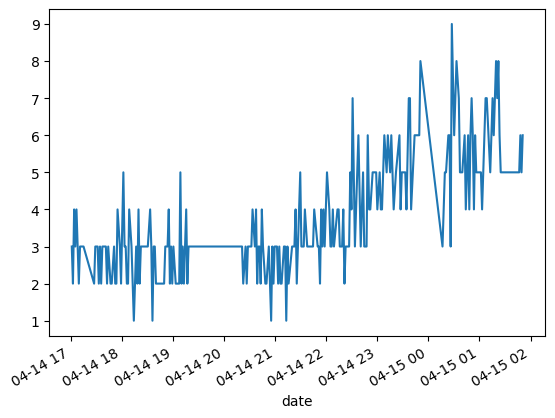

In [18]:
df.query("sensor.str.contains('pm25env').values")['m'].plot()

**&#167; Task:**  **Make a statement about your plot, noting the pattern you see.  Keep your statement to 
  less than 3 sentences.**